https://finance.yahoo.com/quote/SSRM?p=SSRM&.tsrc=fin-srch

https://algotrading101.com/learn/yahoo-finance-api-guide/

https://trading-data-analysis.pro/trading-using-python-simple-moving-average-sma-8713caf0d4ee

https://charticulator.com/app/index.html

https://dash.plotly.com/basic-callbacks

Every time the SMA50 crosses above the SMA200 we know that the market is in an **upward trend**, 
and when the SMA50 crosses below the SMA200 it is a **downward trend**. 

When the SMA50 crosses above the SMA200 it’s known as the “Golden Cross”, and when the SMA50 crosses below the SMA200 it is known as the “Death Cross”. When this event occurs it usually is followed by a strong price movement.

In [25]:
import json
import urllib.request
import yfinance as yf
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)


In [48]:
# stock = yf.Ticker("VWS.CO")
# stock = yf.Ticker("K")
# stock = yf.Ticker("ACKB.BR") # Ackermans&van Haaren (COnstruction/Engineering)
stock = yf.Ticker("RUI.PA") # Rubis (Gas)

# stock = yf.Ticker("0P0000FYPU.F")
# stock = yf.Ticker("SSRA.SG")


# print(stock.info)
hist = stock.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+01:00,2.284091,2.302363,2.270386,2.276782,51637,0.0,0.0
2000-01-04 00:00:00+01:00,2.284092,2.311501,2.275869,2.302364,48389,0.0,0.0
2000-01-05 00:00:00+01:00,2.284091,2.293227,2.247545,2.284091,18771,0.0,0.0
2000-01-06 00:00:00+01:00,2.274954,2.284091,2.247545,2.284091,23411,0.0,0.0
2000-01-07 00:00:00+01:00,2.284091,2.284091,2.260336,2.270386,31013,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.400000,21.549999,21.180000,21.250000,220902,0.0,0.0
2022-10-12 00:00:00+02:00,21.240000,21.240000,20.740000,20.889999,206866,0.0,0.0
2022-10-13 00:00:00+02:00,20.809999,21.500000,20.799999,21.320000,307673,0.0,0.0


In [49]:
print(min(hist.reset_index().Date))
print(max(hist.reset_index().Date))

2000-01-03 00:00:00+01:00
2022-10-17 00:00:00+02:00


In [52]:
end_date = max(hist.reset_index().Date)
start_date = end_date - pd.Timedelta(days=500)
start_date = min(hist.reset_index().Date)

In [53]:
hist2 = hist.copy().reset_index()
hist2 = hist2[hist2.Date >= start_date]
hist2 = hist2.set_index('Date')
print(len(hist2))
hist2

5862


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+01:00,2.284091,2.302363,2.270386,2.276782,51637,0.0,0.0
2000-01-04 00:00:00+01:00,2.284092,2.311501,2.275869,2.302364,48389,0.0,0.0
2000-01-05 00:00:00+01:00,2.284091,2.293227,2.247545,2.284091,18771,0.0,0.0
2000-01-06 00:00:00+01:00,2.274954,2.284091,2.247545,2.284091,23411,0.0,0.0
2000-01-07 00:00:00+01:00,2.284091,2.284091,2.260336,2.270386,31013,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.400000,21.549999,21.180000,21.250000,220902,0.0,0.0
2022-10-12 00:00:00+02:00,21.240000,21.240000,20.740000,20.889999,206866,0.0,0.0
2022-10-13 00:00:00+02:00,20.809999,21.500000,20.799999,21.320000,307673,0.0,0.0


In [54]:
tmp = pd.DataFrame(hist2)
df = tmp['Close'].to_frame()
df['sma50'] = df['Close'].rolling(50, min_periods=50).mean()
df['sma200'] = df['Close'].rolling(200, min_periods=200).mean()
df.dropna(inplace=True)
df

,Close,sma50,sma200
Date,,,
2000-10-06 00:00:00+02:00,2.323629,2.270157,2.278243
2000-10-09 00:00:00+02:00,2.318848,2.273312,2.278454
2000-10-10 00:00:00+02:00,2.333191,2.275990,2.278608
2000-10-11 00:00:00+02:00,2.294942,2.277902,2.278662
2000-10-12 00:00:00+02:00,2.266255,2.278380,2.278573
...,...,...,...
2022-10-11 00:00:00+02:00,21.250000,23.259200,24.446164
2022-10-12 00:00:00+02:00,20.889999,23.207400,24.424074
2022-10-13 00:00:00+02:00,21.320000,23.167800,24.400648


In [55]:
df.loc[df["sma50"] > df["sma200"], "sma50gtsma200"] = True
df["sma50gtsma200"].fillna(False, inplace=True)
df.loc[df["sma50"] < df["sma200"], "sma50ltsma200"] = True
df["sma50ltsma200"].fillna(False, inplace=True)
df

,Close,sma50,sma200,sma50gtsma200,sma50ltsma200
Date,,,,,
2000-10-06 00:00:00+02:00,2.323629,2.270157,2.278243,False,True
2000-10-09 00:00:00+02:00,2.318848,2.273312,2.278454,False,True
2000-10-10 00:00:00+02:00,2.333191,2.275990,2.278608,False,True
2000-10-11 00:00:00+02:00,2.294942,2.277902,2.278662,False,True
2000-10-12 00:00:00+02:00,2.266255,2.278380,2.278573,False,True
...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.250000,23.259200,24.446164,False,True
2022-10-12 00:00:00+02:00,20.889999,23.207400,24.424074,False,True
2022-10-13 00:00:00+02:00,21.320000,23.167800,24.400648,False,True


In [56]:
df["sma50gtsma200co"] = df.sma50gtsma200.ne(df.sma50gtsma200.shift())
df.loc[df["sma50gtsma200"] == False, "sma50gtsma200co"] = False
df["sma50ltsma200co"] = df.sma50ltsma200.ne(df.sma50ltsma200.shift())
df.loc[df["sma50ltsma200"] == False, "sma50ltsma200co"] = False
df

,Close,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,
2000-10-06 00:00:00+02:00,2.323629,2.270157,2.278243,False,True,False,True
2000-10-09 00:00:00+02:00,2.318848,2.273312,2.278454,False,True,False,False
2000-10-10 00:00:00+02:00,2.333191,2.275990,2.278608,False,True,False,False
2000-10-11 00:00:00+02:00,2.294942,2.277902,2.278662,False,True,False,False
2000-10-12 00:00:00+02:00,2.266255,2.278380,2.278573,False,True,False,False
...,...,...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.250000,23.259200,24.446164,False,True,False,False
2022-10-12 00:00:00+02:00,20.889999,23.207400,24.424074,False,True,False,False
2022-10-13 00:00:00+02:00,21.320000,23.167800,24.400648,False,True,False,False


In [57]:
buysignals = df[df["sma50gtsma200co"] == True]
buysignals

,Close,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,
2000-10-13 00:00:00+02:00,2.228007,2.278763,2.278361,True,False,True,False
2001-01-31 00:00:00+01:00,2.324585,2.263521,2.261436,True,False,True,False
2001-12-04 00:00:00+01:00,2.602808,2.504985,2.504502,True,False,True,False
2002-10-28 00:00:00+01:00,2.783098,2.738127,2.737956,True,False,True,False
2003-03-28 00:00:00+01:00,2.835609,2.705402,2.703433,True,False,True,False
2006-09-28 00:00:00+02:00,7.540384,7.376172,7.364738,True,False,True,False
2008-08-11 00:00:00+02:00,7.845830,7.652349,7.650597,True,False,True,False
2009-06-10 00:00:00+02:00,7.462845,6.145485,6.121454,True,False,True,False
2011-12-07 00:00:00+01:00,12.667366,12.550120,12.547328,True,False,True,False


In [58]:
sellsignals = df[df["sma50ltsma200co"] == True]
sellsignals

,Close,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
Date,,,,,,,
2000-10-06 00:00:00+02:00,2.323629,2.270157,2.278243,False,True,False,True
2000-10-17 00:00:00+02:00,2.199320,2.277807,2.277895,False,True,False,True
2001-10-10 00:00:00+02:00,2.433561,2.468792,2.470311,False,True,False,True
2002-09-10 00:00:00+02:00,2.686477,2.703575,2.708042,False,True,False,True
2002-11-07 00:00:00+01:00,2.721135,2.739766,2.740641,False,True,False,True
2006-05-12 00:00:00+02:00,7.274596,7.510286,7.517063,False,True,False,True
2008-01-22 00:00:00+01:00,6.887438,8.287541,8.314714,False,True,False,True
2008-09-16 00:00:00+02:00,7.007549,7.478807,7.485156,False,True,False,True
2011-08-22 00:00:00+02:00,11.319609,12.757092,12.773288,False,True,False,True


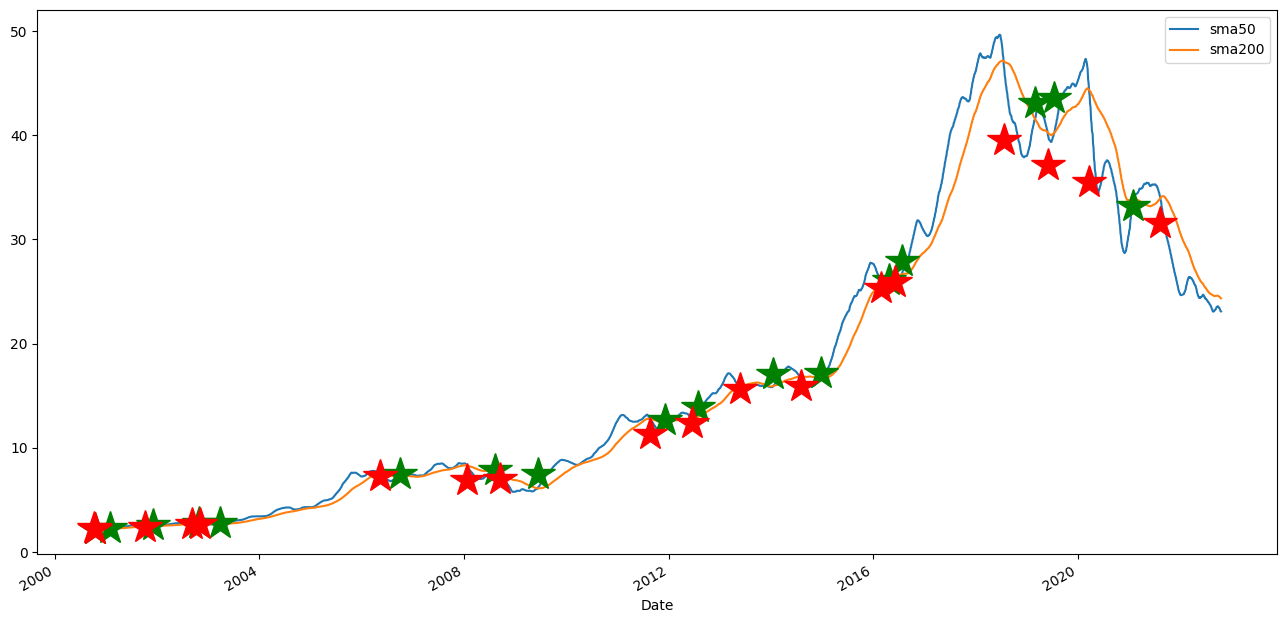

In [63]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
# reliance[['Close', SMA50', 'SMA200']].plot(label='RELIANCE', figsize=(16, 8))
df[['sma50', 'sma200']].plot(label='RELIANCE', figsize=(16, 8))
for idx in buysignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["Close"],
      "g*",
      markersize=25
  )
for idx in sellsignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["Close"],
      "r*",
      markersize=25
  )

In [22]:
df.to_csv('stocks.csv')

In [24]:

# API_TOKEN = '63474c54442c02.21685512'
# STOCK = 'AAPL.US'
# STOCK = 'VWS.CO'
# # STOCK = '0P0000FYPU.F'
# url = f"https://eodhistoricaldata.com/api/eod/{STOCK}?api_token={API_TOKEN}&order=d&fmt=json"

# response = urllib.request.urlopen(url)

# data = json.loads(response.read())

# data